In [1]:
import pandas as pd # Data Processing
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import collections as count # Counting

In [2]:
# For testing estimating and testing statistical models
import statsmodels.api as sm

In [3]:
# For Machine Learning - Data Pre-Processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [4]:
# For Data Pre-Processing for Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [5]:
# For Data Pre-Processing for Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


#importing predictive models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Classifier libraries for Machine learning
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# pip install xgboost
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [6]:
# To Ignore warnings
import warnings 
warnings.filterwarnings("ignore")

In [7]:
# Load the dataset 

df = pd.read_csv(r"C:\Users\DELL\Downloads\Customer-Churn (1).csv")

In [8]:
# Print the top rows

df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
# Print columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# Dimensionality of the data - number of rows and columns

df.shape

(7043, 21)

In [11]:
# Investigate the missing data
null_vals = df.isnull().sum()
null_vals

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

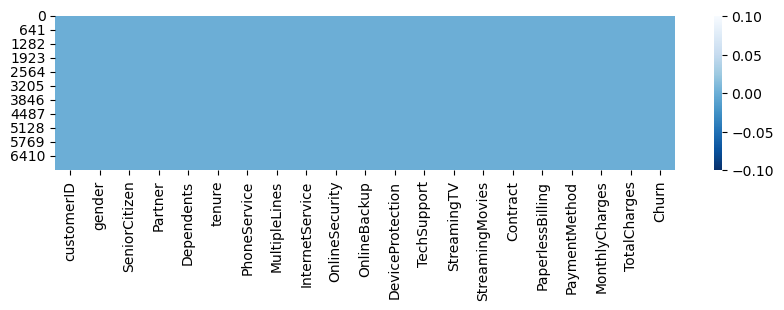

In [12]:
# Visualize the missing data
plt.figure(figsize = (10, 2))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

In [13]:
# Categorical satistical analysis

df.describe(include=["object","bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [14]:
# Numerical satistical analysis

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# Convert non-numeric columns to numeric, ignoring errors

df = df. apply(pd.to_numeric,errors='coerce')

#### Explore Correlations

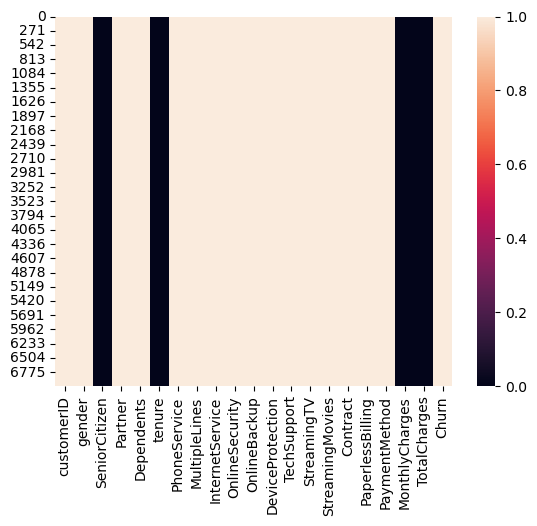

In [16]:

sns.heatmap(df.isnull());

In [17]:
# Load the dataset 

df = pd.read_csv(r"C:\Users\DELL\Downloads\Customer-Churn (1).csv")

In [18]:
# Gender - What percentage of customer are male or female

gender_percentage = df['gender'].value_counts(normalize=True)* 100

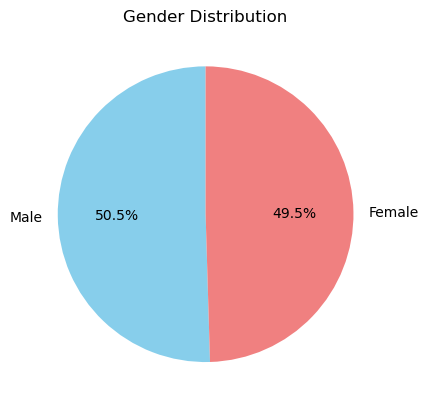

In [19]:
plt.pie(gender_percentage, labels=gender_percentage.index, 
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

#### Observations - The difference in the percentage of male customers to female customers 
#### are slim therefore both the male and female customers are almost equal subscribers.

In [20]:
# SeniorCitizen - classify the customers using 'Yes' or 'No'
# Convert numerical values to 'Yes' or 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

senior_citizen_counts = df['SeniorCitizen'].value_counts()

In [21]:
print("SeniorCitizen Distribution:\n", senior_citizen_counts)

SeniorCitizen Distribution:
 SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


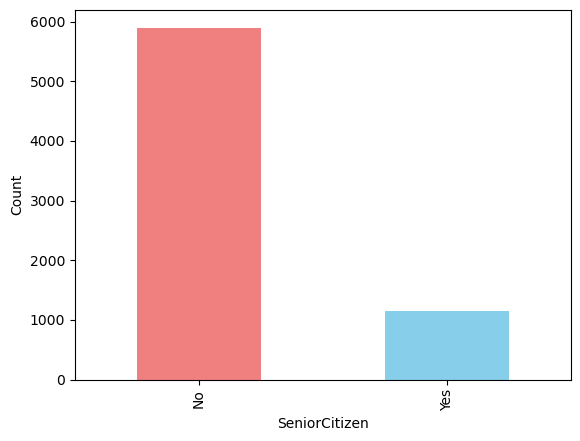

In [23]:
senior_citizen_counts.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()

#### Observations - This visualizes that 1,142 customers are categorized as Senior Citizen 
#### while  5,901 customers are not in the category of Senior Citizen.

In [24]:
# Show the percentage of customers with or without partners

#Converting the strings to integers

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

In [25]:
total_customers = len(df)
with_partner = df['Partner'].sum()
without_partner = total_customers - with_partner

percentage_with_partner = (with_partner / total_customers)*100
percentage_without_partner = (without_partner/total_customers)*100

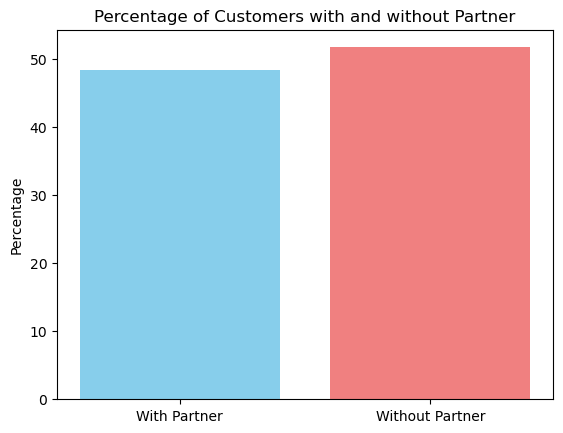

In [32]:
labels = ['With Partner', 'Without Partner']
percentages = [percentage_with_partner, percentage_without_partner]
plt.bar(labels, percentages, color=['skyblue', 'lightcoral'],)
plt.ylabel('Percentage')
plt.title('Percentage of Customers with and without Partner')
plt.show()


#### Observation - About 48% of customers have partners and about 52% are without partners

In [33]:
# Dependents - What is the percentage of customers that are dependents and those that are not?

dependents_counts = df['Dependents'].value_counts()

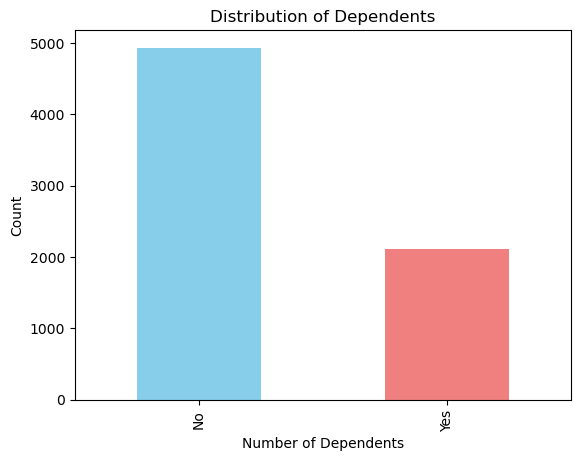

In [34]:
dependents_counts.plot(kind='bar', color=['skyblue','lightcoral'])
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Distribution of Dependents')
plt.show()

#### Observation - There is a high number of customers that are independent about 
#### 4,900 customers compared to those that are dependent about 2,100

In [35]:
# Print top rows

df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [36]:
# Tenure - Describe the tenure for the top 10 customers

top_10_customers = df.nlargest(10, 'tenure')

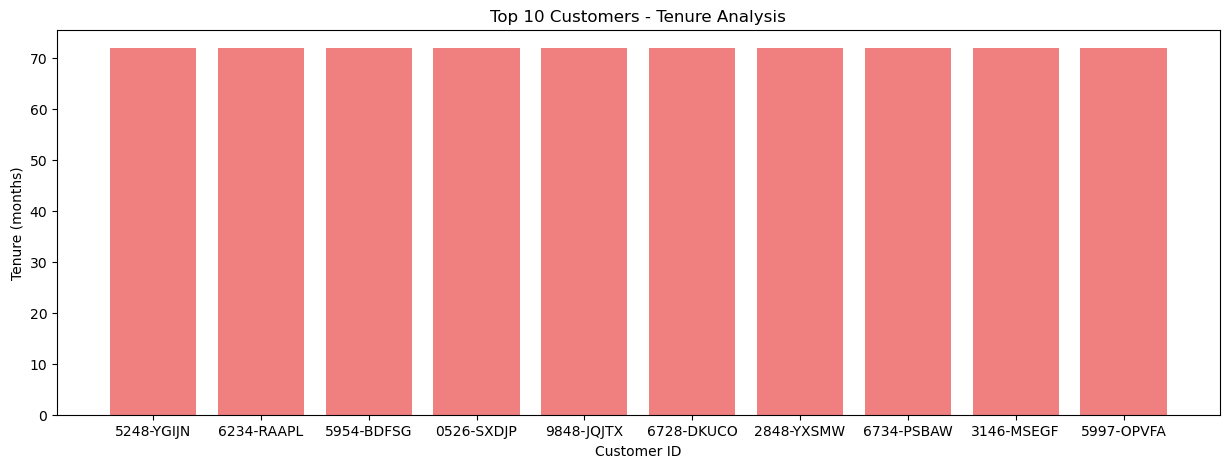

In [37]:
plt.figure(figsize=(15,5))
plt.bar(top_10_customers['customerID'], top_10_customers['tenure'], color='lightcoral')
plt.xlabel('Customer ID')
plt.ylabel('Tenure (months)')
plt.title('Top 10 Customers - Tenure Analysis')
plt.show()

#### Observations - The top 10 customers in the company has been with the company for same length of months and are due for loyalty rewards.

In [38]:
# Phone Service and Multiple Lines - What are the percentage of clients who use phone service in comparison to those with multiple lines

phone_service_counts = df['PhoneService'].value_counts()
multiple_lines_counts = df['MultipleLines'].value_counts()

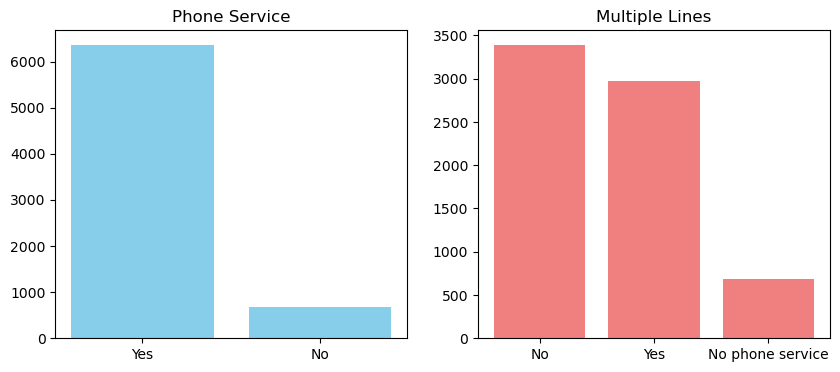

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(phone_service_counts.index, phone_service_counts, color='skyblue')
axes[0].set_title('Phone Service')
axes[1].bar(multiple_lines_counts.index, multiple_lines_counts, color='lightcoral')
axes[1].set_title('Multiple Lines')

plt.show()

#### Observation - Over 6,400 customers use phone service and about 2,900 out of the 6,400 use multiple lines

In [41]:
# Internet Service - What internet service has the highest subscription?

internet_service_counts = df['InternetService'].value_counts()
print(internet_service_counts) 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


In [42]:
highest_subscription_service = internet_service_counts.idxmax()
print("Internet service with the highest subscription:",
     highest_subscription_service)

Internet service with the highest subscription: Fiber optic


In [43]:
least_subscription_service = internet_service_counts.idxmin()
print("Internet service with the least subscription:",
     least_subscription_service)

Internet service with the least subscription: No


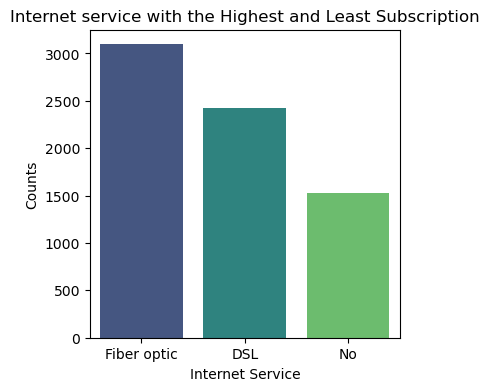

In [46]:
plt.figure(figsize=(4, 4))
sns.countplot(x='InternetService', data=df,
order=internet_service_counts.index, palette='viridis')
plt.title('Internet service with the Highest and Least Subscription')
plt.xlabel('Internet Service')
plt.ylabel('Counts')
plt.show()

#### Observation - about 3,096 customers use Fiber Optic, 2,421 customers use DSL Internet Service while 1,526 customers do not use any of the Internet Services.

In [48]:
# Online Security - How many customers are connected to the online security

online_security_counts = df['OnlineSecurity'].value_counts()

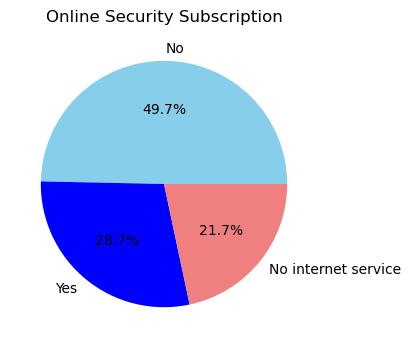

In [50]:
# Create a pie chart

plt.figure(figsize=(4, 4))
plt.pie(online_security_counts, labels=online_security_counts.index, 
autopct= '%1.1f%%', colors=['skyblue','blue','lightcoral'])
plt.title('Online Security Subscription')
plt.show()

#### Observation - This shows that only 28.7% of customers are subscribed and connected to Online Security, 21.7% are subscribed but are not connected while 49.7% are not subscribed.

In [52]:
# Device Protection - what percentage of customers have their device protected

device_protection_counts = df['DeviceProtection'].value_counts()

In [53]:
# To calculate the percentge of customers with device protection and those without.

total_customers = len(df)
percentage_with_protection = (device_protection_counts['Yes'] / total_customers) *100
percentage_without_protection = (device_protection_counts['No'] / total_customers) *100

print(f"Percentage of customers with Device Protection: {percentage_with_protection:.2f}%")
print(f"Percentage of customers without Device Protection: {percentage_without_protection:.2f}%")

Percentage of customers with Device Protection: 34.39%
Percentage of customers without Device Protection: 43.94%


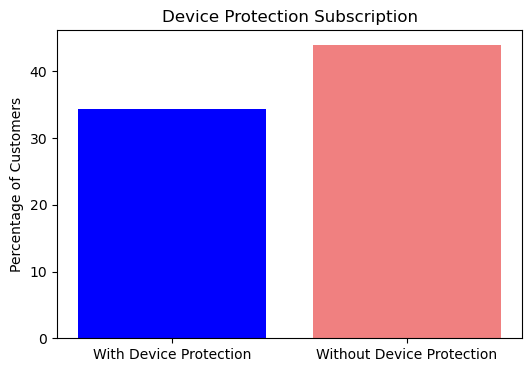

In [56]:
plt.figure(figsize=(6, 4))
plt.bar(['With Device Protection', 'Without Device Protection'], [percentage_with_protection,
percentage_without_protection], color=['blue', 'lightcoral'])
plt.title('Device Protection Subscription')
plt.ylabel('Percentage of Customers')
plt.show()

#### This visualization shows that there is a high percentage of customers without 
#### Device Protection about 44% in comparison to customers with Device Protection about 35%

In [57]:
# Tech Support - compare the percentage of customers that request for tech support to customers that do not.

tech_support_counts = df['TechSupport'].value_counts()

In [58]:
total_customers = len(df)
percentage_with_tech_support = (tech_support_counts['Yes'] / total_customers) *100
percentage_without_tech_support = (tech_support_counts['No'] / total_customers) *100

print(f"Percentage of customers with Tech Support: {percentage_with_tech_support:.2f}%")
print(f"Percentage of customers without Device Protection: {percentage_without_tech_support:.2f}%")

Percentage of customers with Tech Support: 29.02%
Percentage of customers without Device Protection: 49.31%


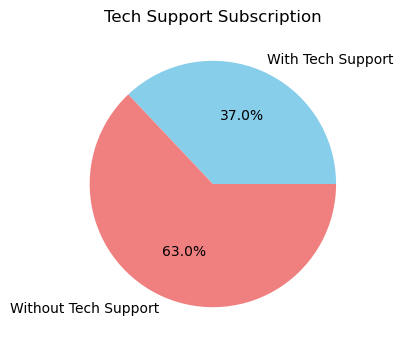

In [59]:
labels = ['With Tech Support', 'Without Tech Support']
sizes = [percentage_with_tech_support, percentage_without_tech_support]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Tech Support Subscription')
plt.show()

####  observation -There is a 63% of customers who do not need a tech support while 37% of customers

In [60]:
# Streaming TV - Examine the percentage of customers that stream TV

streaming_tv_counts = df['StreamingTV'].value_counts()

In [61]:
total_customers = len(df)
percentage_with_streaming_tv = (streaming_tv_counts['Yes'] / total_customers) * 100
percentage_without_streaming_tv = (streaming_tv_counts['No'] / total_customers) * 100
percentage_not_subscribed = 100 - (percentage_with_streaming_tv + percentage_without_streaming_tv)

print(f"Percentage of customers with Streaming TV: {percentage_with_streaming_tv:.2f}%")
print(f"Percentage of customers without Streaming TV: {percentage_without_streaming_tv:.2f}%")
print(f"Percentage of customers not subscribed to any streaming service: {percentage_not_subscribed:.2f}%")

Percentage of customers with Streaming TV: 38.44%
Percentage of customers without Streaming TV: 39.90%
Percentage of customers not subscribed to any streaming service: 21.67%


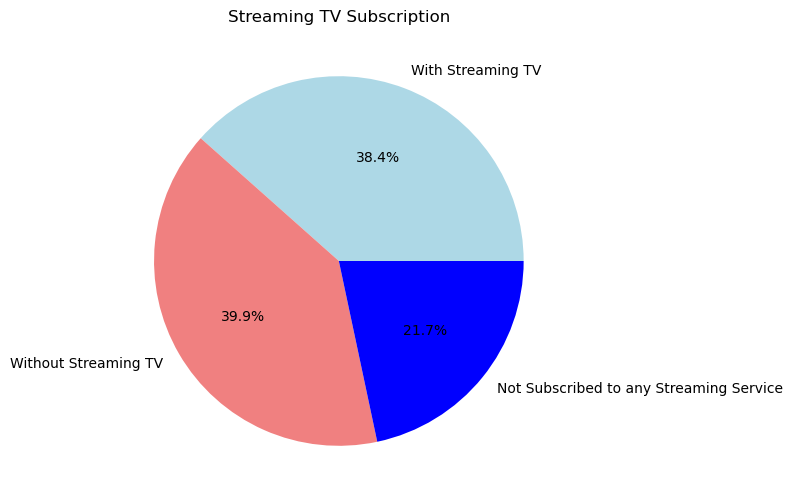

In [63]:
labels = ['With Streaming TV', 'Without Streaming TV', 'Not Subscribed to any Streaming Service']
sizes = [percentage_with_streaming_tv, percentage_without_streaming_tv, percentage_not_subscribed]
colors = ['lightblue', 'lightcoral', 'blue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Streaming TV Subscription')
plt.show()

In [64]:
# Streaming movies - Exmamine the percentageof customers streaming movies

streaming_movies_counts = df['StreamingMovies'].value_counts()

In [65]:
total_customers = len(df)
percentage_with_streaming_movies = (streaming_movies_counts['Yes'] / total_customers) * 100
percentage_without_streaming_movies = (streaming_movies_counts['No'] / total_customers) * 100
percentage_not_subscribed = 100 - (percentage_with_streaming_movies + percentage_without_streaming_movies)

print(f"Percentage of customers with Streaming Movies: {percentage_with_streaming_movies:.2f}%")
print(f"Percentage of customers without Streaming Movies: {percentage_without_streaming_movies:.2f}%")
print(f"Percentage of customers not subscribed to any streaming service: {percentage_not_subscribed:.2f}%")

Percentage of customers with Streaming Movies: 38.79%
Percentage of customers without Streaming Movies: 39.54%
Percentage of customers not subscribed to any streaming service: 21.67%


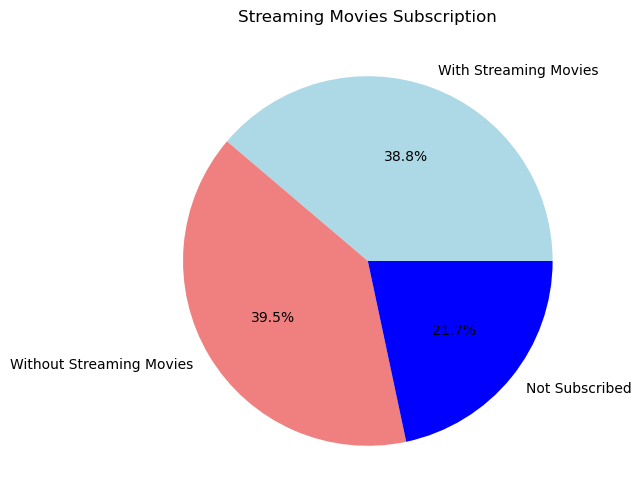

In [66]:
labels = ['With Streaming Movies', 'Without Streaming Movies', 'Not Subscribed']
sizes = [percentage_with_streaming_movies, percentage_without_streaming_movies, percentage_not_subscribed]
colors = ['lightblue', 'lightcoral', 'blue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Streaming Movies Subscription')
plt.show()

In [67]:
# Contract Period - Create an anlysis on the contract period for customers (weekly, monthly, yearly)

contract_percentage = df['Contract'].value_counts(normalize=True) * 100

In [68]:
print("Contract Distribution:")
print(contract_percentage)

Contract Distribution:
Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64


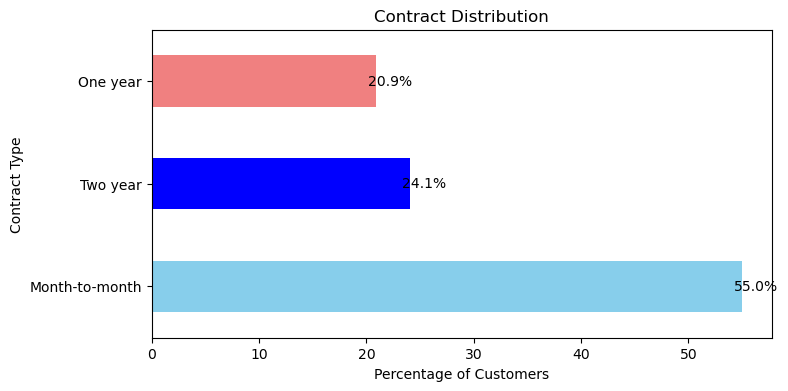

In [79]:
plt.figure(figsize=(8, 4))
ax = contract_percentage.plot(kind='barh', color=['skyblue', 'blue', 'lightcoral'])
plt.title('Contract Distribution')
plt.xlabel('Percentage of Customers')
plt.ylabel('Contract Type')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}%', (p.get_width(), p.get_y() + p.get_height() /2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.show()

In [80]:
# Paperless Billing

paperless_percentage = df['PaperlessBilling'].value_counts(normalize=True) * 100

In [81]:
print("Paperless Billing Distribution:")
print(paperless_percentage)

Paperless Billing Distribution:
PaperlessBilling
Yes    59.221922
No     40.778078
Name: proportion, dtype: float64


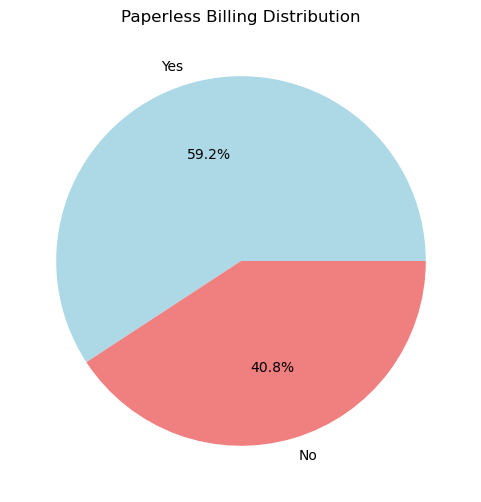

In [82]:
plt.figure(figsize=(6, 6))
plt.pie(paperless_percentage, labels=paperless_percentage.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Paperless Billing Distribution')
plt.show()

In [83]:
# Payment Method - Calculate the differnt payment method used by customers

payment_method_counts = df['PaymentMethod'].value_counts()

In [84]:
print("Payment Method Counts")
print(payment_method_counts)

Payment Method Counts
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


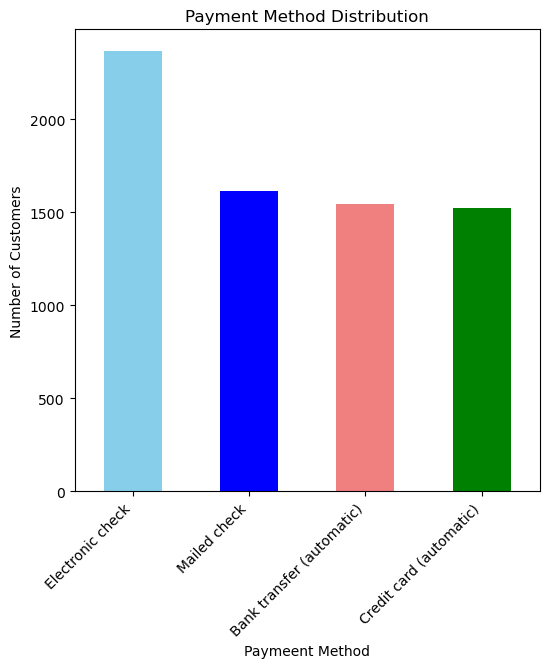

In [86]:
plt.figure(figsize=(6,6))
payment_method_counts.plot(kind='bar', color=['skyblue','blue','lightcoral','green'])
plt.title('Payment Method Distribution')
plt.xlabel('Paymeent Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()
           

In [87]:
# Examine the columns and features of the data

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [88]:
# Print top rows

df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [89]:
# Monthly Charges - 

monthly_charges_stats = df['MonthlyCharges'].describe()
print(monthly_charges_stats)

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


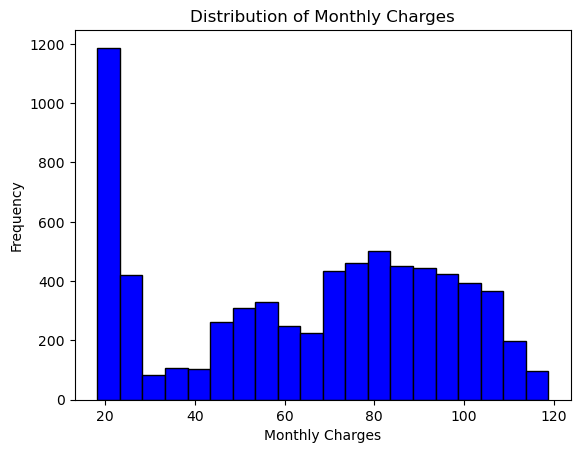

In [90]:
# Histogram for distribution

plt.hist(df['MonthlyCharges'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

In [91]:
# Total Charges 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [92]:
total_charges_stats = df['TotalCharges'].describe()
print(total_charges_stats)

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


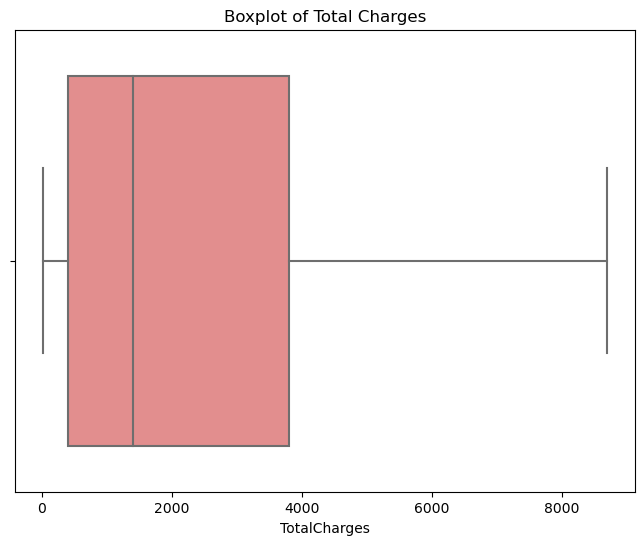

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalCharges', data=df, color='lightcoral')
plt.xlabel('TotalCharges')
plt.title('Boxplot of Total Charges')
plt.show()

In [ ]:
# Monthly Charges

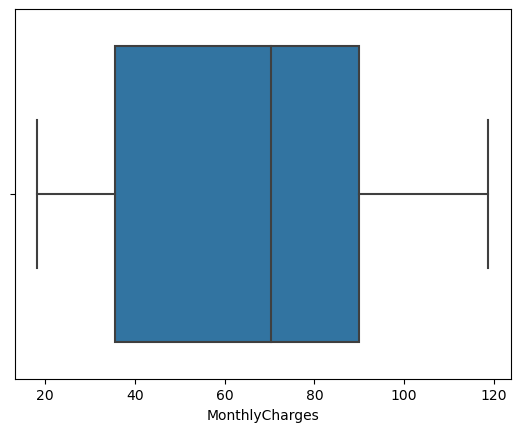

In [94]:
#Check for outliers
sns.boxplot(x=df["MonthlyCharges"]);

### Bivariate analysis

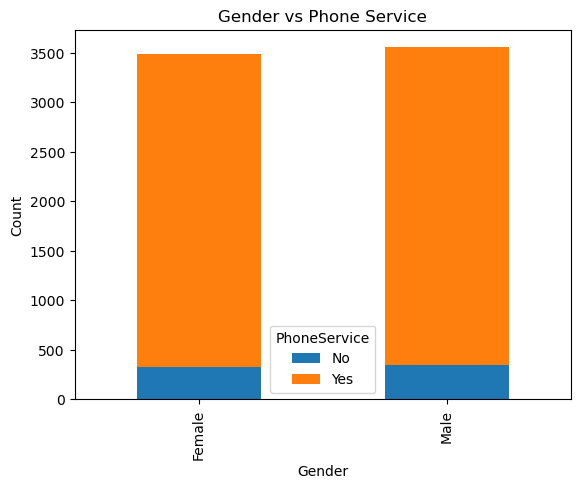

In [95]:
# Bivariate Analysis for Gender and Phone Service

gender_phone= pd.crosstab(df['gender'], df['PhoneService'])
gender_phone.plot(kind='bar',stacked=True)
plt.title('Gender vs Phone Service')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

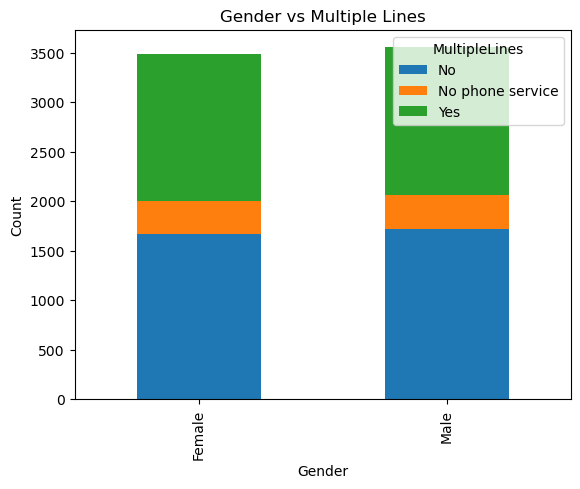

In [96]:
# Bivariate Analysis for Gender and Multiple Lines

gender_lines= pd.crosstab(df['gender'], df['MultipleLines'])
gender_lines.plot(kind='bar',stacked=True)
plt.title('Gender vs Multiple Lines')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

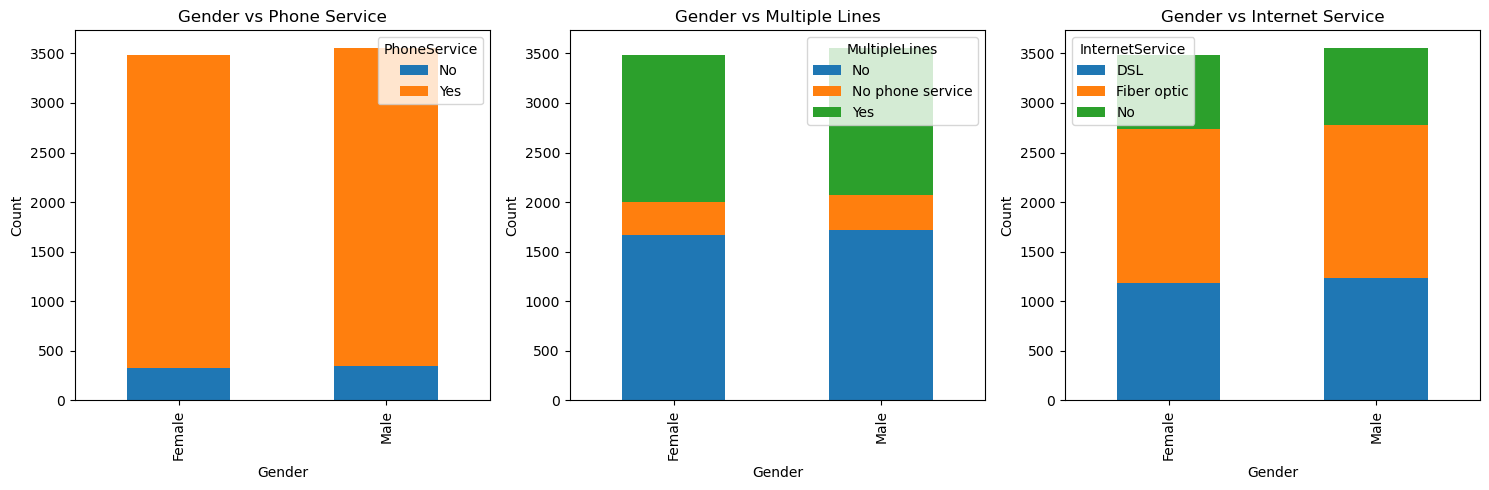

In [97]:
# Set up subplots

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

gender_phone = pd.crosstab(df['gender'], df['PhoneService'])
gender_phone.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Gender vs Phone Service')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

gender_lines = pd.crosstab(df['gender'], df['MultipleLines'])
gender_lines.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Gender vs Multiple Lines')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

gender_internet = pd.crosstab(df['gender'], df['InternetService'])
gender_internet.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Gender vs Internet Service')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Observations - This visualization shows the comparative view of how different genders interact with these services (Phone Service, Multiple lines, Internet Service)

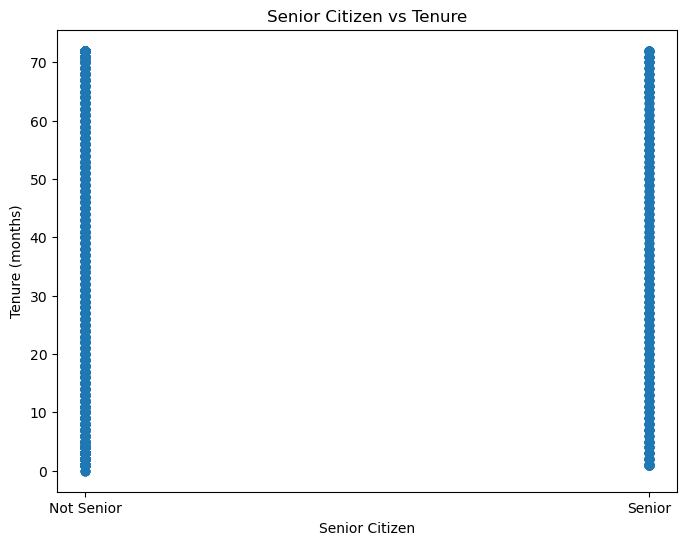

In [98]:
# Bivariate analysis on Senior Citizen and Tenure

plt.figure(figsize=(8, 6))
plt.scatter(df['SeniorCitizen'], df['tenure'], alpha=0.5)
plt.title('Senior Citizen vs Tenure')
plt.xlabel('Senior Citizen')
plt.ylabel('Tenure (months)')
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.show()

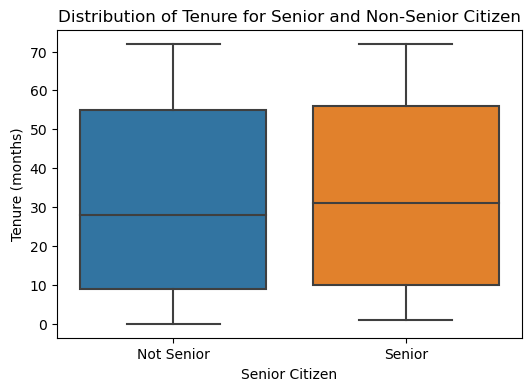

In [100]:

plt.figure(figsize=(6, 4))
sns.boxplot(x='SeniorCitizen', y='tenure', data=df)
plt.title('Distribution of Tenure for Senior and Non-Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Tenure (months)')
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.show()
           

In [ ]:
# An analysis on Partner in realtion with Phone Service, Multiple Lines, Internet Services

In [101]:
data = {'Partner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'], 'PhoneService': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']}
df = pd.DataFrame(data)

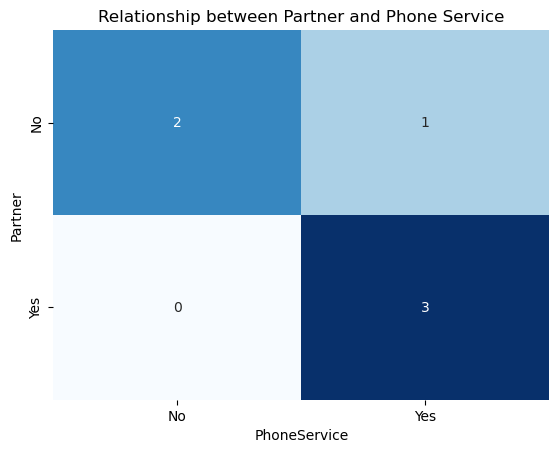

In [103]:
# Create a cross tabulation table

cross_table = pd.crosstab(df['Partner'], df['PhoneService'])

sns.heatmap(cross_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('PhoneService')
plt.ylabel('Partner')
plt.title('Relationship between Partner and Phone Service')
plt.show()

### This visualization indicates that a high percentage of customers who have partners use Phone Service

In [104]:
# Print top rows

df.head()

,Partner,PhoneService
0,Yes,Yes
1,No,No
2,Yes,Yes
3,No,No
4,Yes,Yes


In [105]:
data = {'Partner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'], 'MultipleLines': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No']}
df = pd.DataFrame(data)

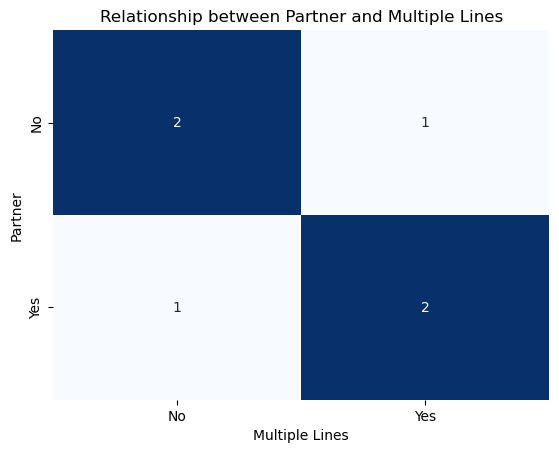

In [106]:
cross_table = pd.crosstab(df['Partner'], df['MultipleLines'])

sns.heatmap(cross_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Multiple Lines')
plt.ylabel('Partner')
plt.title('Relationship between Partner and Multiple Lines')
plt.show()

### Observation - This visualization shows that there is equal percentage of customers who has partners aand use multiple lines and those who do not have partners and dont use multiple lines.

In [107]:
data = {'Partner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'], 
        'InternetService': ['DSL', 'Fiberoptic', 'DSL', 'DSL', 'Fiberoptic', 'DSL']}
df = pd.DataFrame(data)

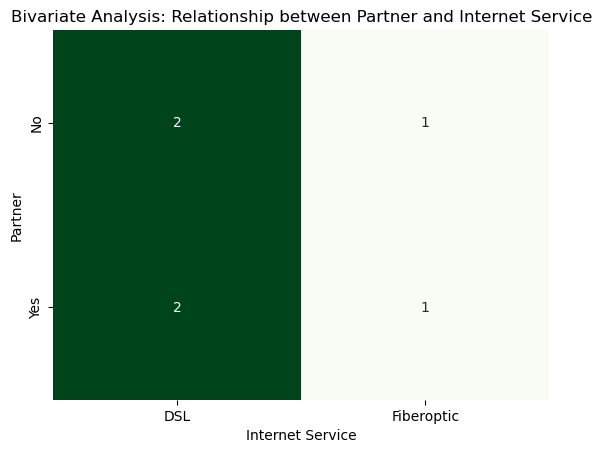

In [108]:
cross_table = pd.crosstab(df['Partner'], df['InternetService'])

sns.heatmap(cross_table, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Internet Service')
plt.ylabel('Partner')
plt.title('Bivariate Analysis: Relationship between Partner and Internet Service')
plt.show()

### Observation - This shows that the most preferred Internet Service for customers is DSL

In [109]:
data = {'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
       'StreamingTV': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
       'StreamingMovies': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes']}
df = pd.DataFrame(data)

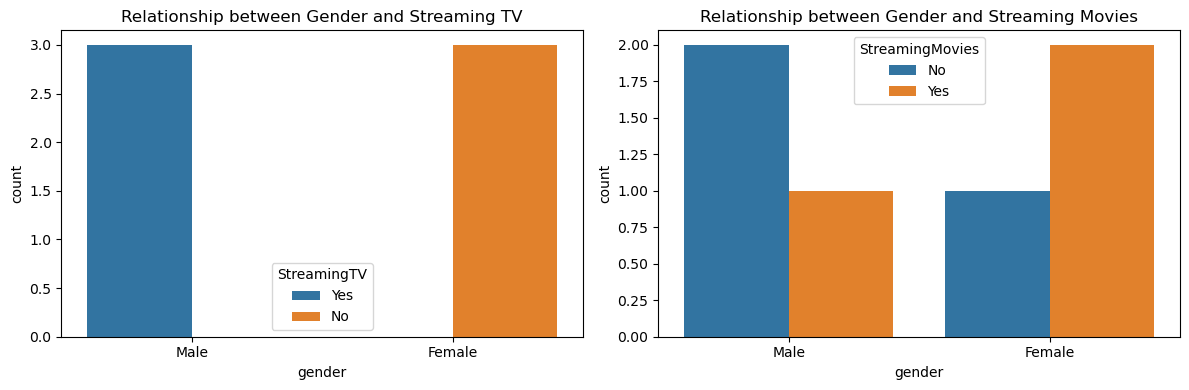

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='gender', hue='StreamingTV', data=df, ax=axes[0])
axes[0].set_title('Relationship between Gender and Streaming TV')

sns.countplot(x='gender', hue='StreamingMovies', data=df, ax=axes[1])
axes[1].set_title('Relationship between Gender and Streaming Movies')

plt.tight_layout()
plt.show();

### This visualization helps to understand the behavioural pattern within genders in streaming TV and Movies. It shows that female stream more movies than male while both male and female stream TV on an equal range.

In [ ]:
# Bivariate analysis for Partner and Contract

In [111]:
data = {'Partner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
       'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year', 'One year', 'Two year']}
df = pd.DataFrame(data)

In [112]:
cross_table = pd.crosstab(df['Partner'], df['Contract'])

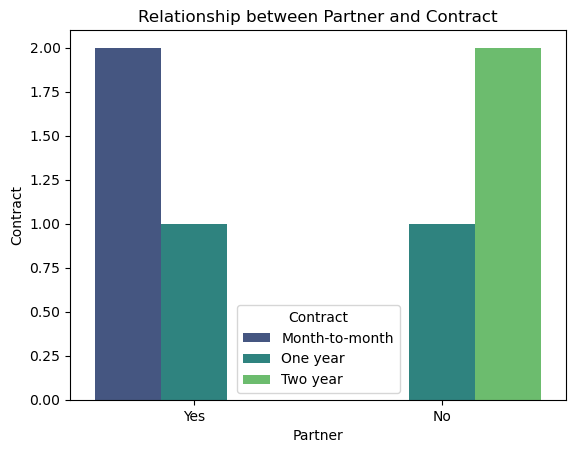

In [113]:
sns.countplot(x='Partner', hue='Contract', data=df, palette='viridis')
plt.xlabel('Partner')
plt.ylabel('Contract')
plt.title('Relationship between Partner and Contract')
plt.show()

### This visualization shows that customers without partners tend to subscribe to a longer contract period (Two Year) while those with partners subscribe more of month to month contract.

In [114]:
# Customer ID and Tenure

data = {'CustomerID': [1,2,3,4,5,6],
       'Tenure': [12, 24, 8, 36, 18, 6]}
df = pd.DataFrame(data)

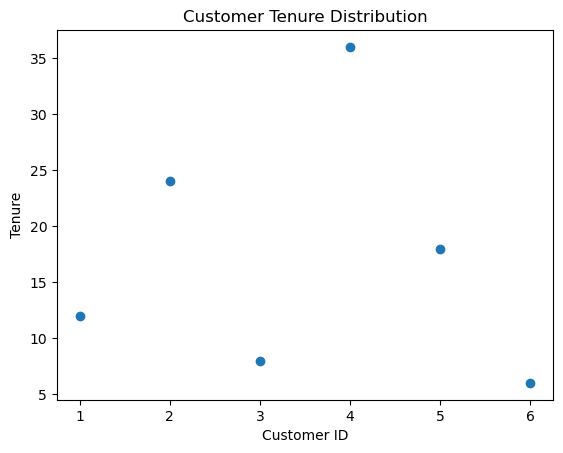

In [115]:
plt.scatter(df['CustomerID'], df['Tenure'])
plt.xlabel('Customer ID')
plt.ylabel('Tenure')
plt.title('Customer Tenure Distribution')
plt.show()

In [ ]:
# Bivariate analysis between Gender and Payment Method

In [119]:
# Load the dataset 

df = pd.read_csv(r"C:\Users\DELL\Downloads\Customer-Churn (1).csv")

In [120]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [121]:
contingency_table = pd.crosstab(df['gender'], df['PaymentMethod'])

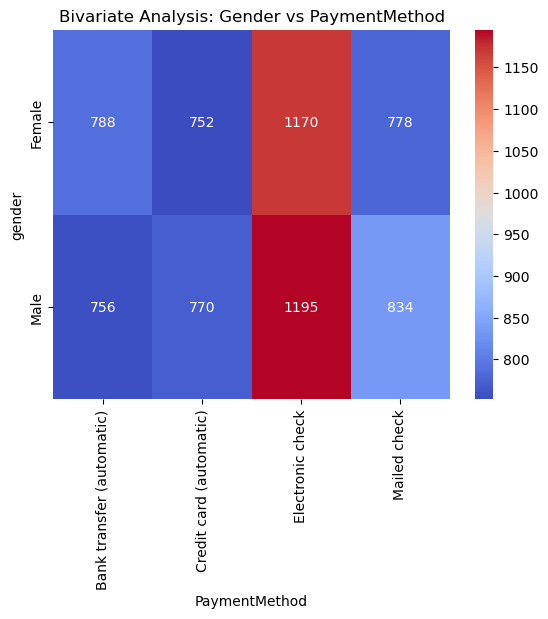

In [124]:
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Bivariate Analysis: Gender vs PaymentMethod')
plt.show()

### This visualization shows the most preferred payment method by both gender.

## Multivariate analysis

In [125]:
# Examine the columns and features of the data

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [126]:
original_length = len(df['StreamingTV'])
dummies_length = len(pd.get_dummies(df['StreamingTV'], drop_first=True))

print("Original Length:", original_length)
print("Dummies Length:", dummies_length)

Original Length: 7043
Dummies Length: 7043


In [127]:
# Convert non-numeric columns to numeric, ignoring errors

df = df. apply(pd.to_numeric,errors='coerce')

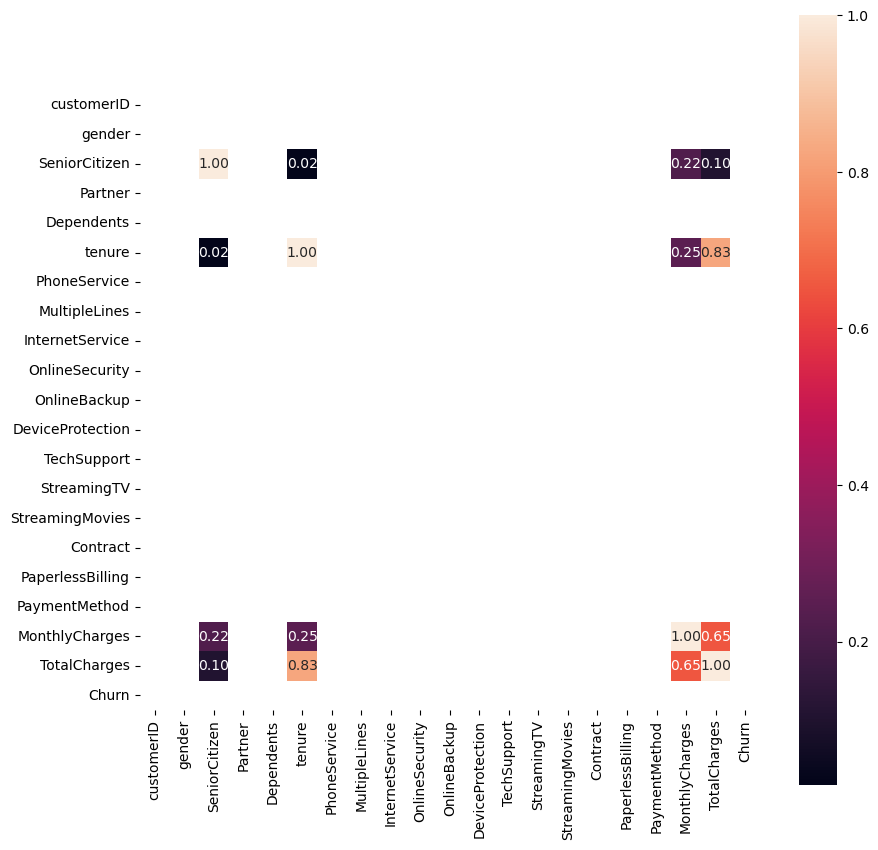

In [128]:
# Corelation between the sales price and other variables

plt.figure(figsize = (10, 10))
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10})

### Encoding categorical Variables

In [ ]:
# Create a new dataframe and assign it to a variable Data Frame 1

# label Encoding
from sklearn.preprocessing import LabelEncoder

# Method Initialization
encoder = LabelEncoder()

# Looping for columns except survived

for new in df.columns:
    if (df[new] .dtype == 'object'):
        df[new] = encoder.fit_transform(df[new])
    else:
         df[new] = df[new]
           
df.head()

df_new = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
           'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

label = df['Churn']

df_new

In [34]:
# Normalize Data
scaler = MinMaxScaler()

# Scale data
df_new = scaler.fit_transform(df_new)
df_new

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.38361409],
       [1.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.2245023 ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.02404288],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.11293532,
        0.45849923],
       [1.        , 1.        , 1.        , ..., 1.        , 0.55870647,
        0.40735069],
       [1.        , 0.        , 0.        , ..., 0.        , 0.86965174,
        0.8280245 ]])

### Model Selection, training and Validation

In [36]:
 pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Train and test at least 3 Supervised learning model

X_train, X_test, y_train, y_test = train_test_split(df_new, label, test_size=0.2, random_state=42)


In [46]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)  #Machine Learning aspect

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.815471965933286
Precision: 0.6877076411960132
Recall: 0.5549597855227882
F1-score: 0.6142433234421364
AUC-ROC: 0.7321130973945987


In [47]:
ly_pred

array([1, 0, 0, ..., 0, 0, 0])

In [48]:
y_test.head(2)

185     1
2715    0
Name: Churn, dtype: int32

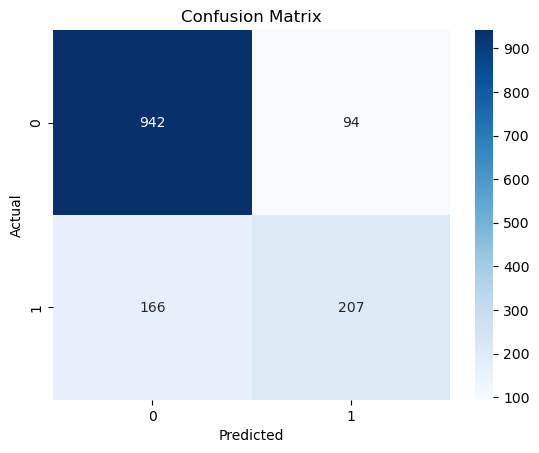

In [54]:
# Create a confusion matrix for Logistic Regression
lcm = confusion_matrix (y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [55]:
# Model Building
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.7963094393186657
Precision: 0.6666666666666666
Recall: 0.46112600536193027
F1-score: 0.5451664025356576
AUC-ROC: 0.6890572111751736


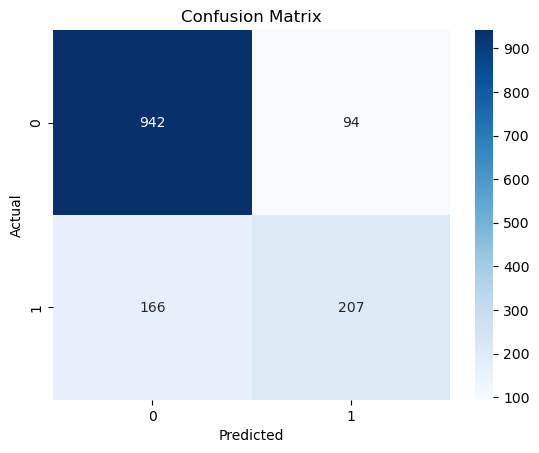

In [71]:
# Create a confusion matrix for Random Forest Classifier
rfc = confusion_matrix (y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(rfc, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:

Classifiers = [[XGBClassifier(), 'XGB Classifier'],
[RandomForestClassifier(), 'Random Forest'],
[KNeighborsClassifier(), 'K-Nearest Neighbors'],
[SGDClassifier(), 'SGD Classifier'],
[SVC(), 'SVC'],
[GaussianNB(), "Naive Bayes"],
[DecisionTreeClassifier(random_state = 42), "Decision Tree"],
[LogisticRegression(), 'Logistic Regression']]


In [79]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}


for classifier in Classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
if model_name != Classifiers[-1][1]:
    print('')

In [63]:
classifier[1]

'Logistic Regression'

In [65]:
print('Accuracy Score')
d1 = pd.DataFrame(acc_list)
d1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,79.28%,78.92%,76.79%,81.12%,80.77%,75.8%,72.82%,81.55%


In [81]:
print('Precision List')
d2 = pd.DataFrame(precision_list)
d2.head()

Precision List


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,62.54%,65.93%,56.97%,74.68%,69.03%,52.94%,48.57%,68.77%


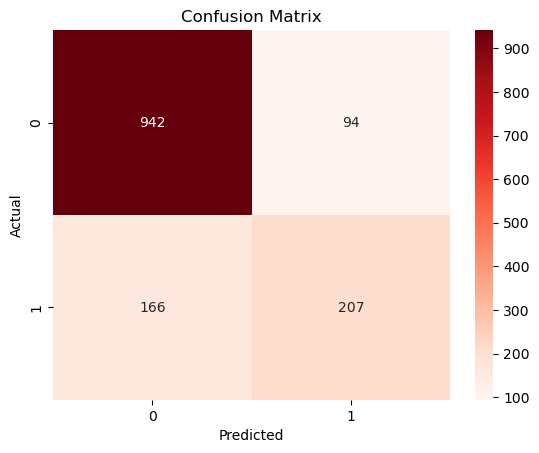

In [85]:
# Create a confusion matrix for Precision List
precision_list = confusion_matrix (y_test, pred)

# Visualize the confusion matrix
sns.heatmap(precision_list, annot=True, cmap="Reds", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [82]:
print('Recall List')
d3 = pd.DataFrame(recall_list)
d3.head()

Recall List


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,54.16%,47.72%,50.4%,30.83%,49.6%,77.21%,45.58%,55.5%


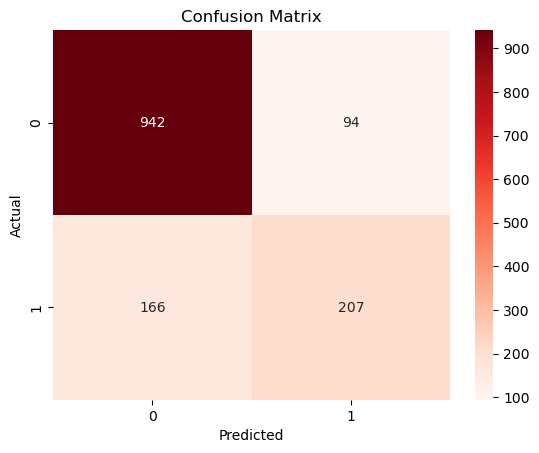

In [84]:
# Create a confusion matrix for Recall List
recall_list = confusion_matrix (y_test, pred)

# Visualize the confusion matrix
sns.heatmap(recall_list, annot=True, cmap="Reds", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [83]:
print('ROC List')
d4 = pd.DataFrame(roc_list)
d4.head()

ROC List


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,71.24%,69.42%,68.35%,63.53%,70.79%,76.25%,64.1%,73.21%


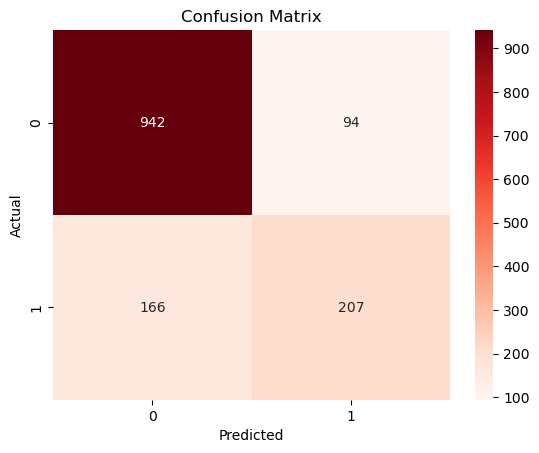

In [72]:
# Create a confusion matrix for ROC
roc_list = confusion_matrix (y_test, pred)

# Visualize the confusion matrix
sns.heatmap(roc_list, annot=True, cmap="Reds", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()